# 신경망 ・ 딥러닝의 응용(필기체 숫자 인식) 

## MNIST 데이터 베이스

In [ ]:
#-- 리스트 8-1-(1)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

훈련용 데이터: 60,000개  
테스트 데이터: 10,000개  

28x28의 데이터 배열을 28*28을 한 784로 변환한 후에, 신경망을 통과시킨다.

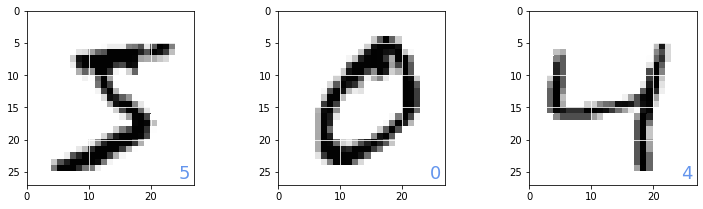

In [ ]:
# - 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

## Keras를 이용한 2층 피드 포워드 네트워크 모델


모델을 Sequential()로 정의하고, 16개의 hidden layer, 10개의 output layer를 정의했다.  
Optimizer의 경우 Adam을 사용하였는데, 다른 Optimizer인 RMSProp과 Momentum 방식을 결합해서 만든 Optimizer이다.  



In [ ]:
#-- 리스트 8-1-(3)
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
#-- 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D)

In [ ]:
#-- 리스트 8-1-(5)
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.9302 - val_loss: 0.2453 - val_accuracy: 0.9331
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2415 - accuracy: 0.9322 - val_loss: 0.2376 - val_accuracy: 0.9334
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.9346 - val_loss: 0.2314 - val_accuracy: 0.9356
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2269 - accuracy: 0.9364 - val_loss: 0.2261 - val_accuracy: 0.9359
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2204 - accuracy: 0.9380 - val_loss: 0.2212 - val_accuracy: 0.9370
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9397 - val_loss: 0.2149 - val_accuracy: 0.9381
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.9403 - val_loss: 0.2106 - val_accuracy: 0.9397
Epoch 8/10
60/60 [==

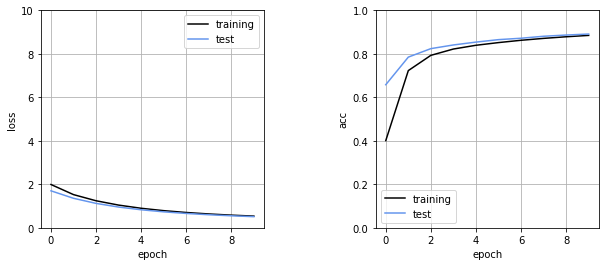

In [ ]:
#-- 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

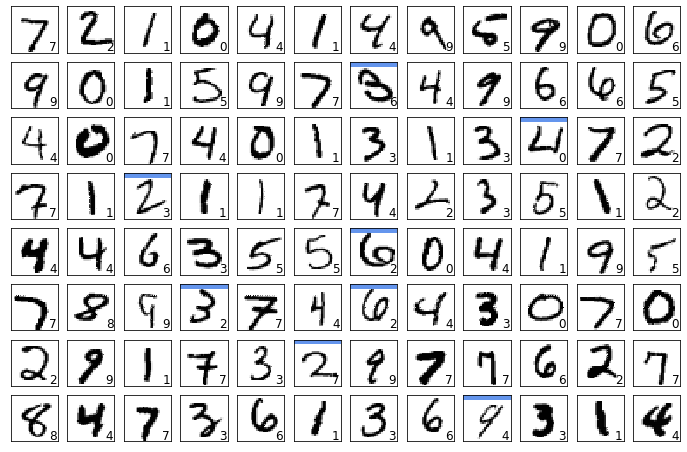

In [ ]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

## Activation Function(활성함수)

기존의 활성함수로는 Sigmoid 함수를 사용했지만, 최근에는 max(x, 0)인 ReLU 함수를 주로 사용한다.  
Sigmoid 함수의 경우, 입력 x가 커질수록 1에 가까워지고 그에 따라서 편미분값은 0에 가까워진다.  
이는 Gradient Descent의 학습이 늦어지는 문제점이 있다. 이에 대안으로 등장한 함수가 ReLU 함수이다.

Sigmoid 함수를 사용했을때 Accuracy가 0.89인 반면, ReLU 함수를 사용했을때는 0.92를 기록했다.

In [ ]:
#-- 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 1.5972 - accuracy: 0.5010 - val_loss: 1.0304 - val_accuracy: 0.7545
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7615 - accuracy: 0.8206 - val_loss: 0.5494 - val_accuracy: 0.8652
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4849 - accuracy: 0.8759 - val_loss: 0.4098 - val_accuracy: 0.8937
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3904 - accuracy: 0.8963 - val_loss: 0.3495 - val_accuracy: 0.9072
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.9063 - val_loss: 0.3175 - val_accuracy: 0.9157
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.9137 - val_loss: 0.2964 - val_accuracy: 0.9197
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.9177 - val_loss: 0.2823 - val_accuracy: 0.9220
Epoch 8/10
60/60 [==

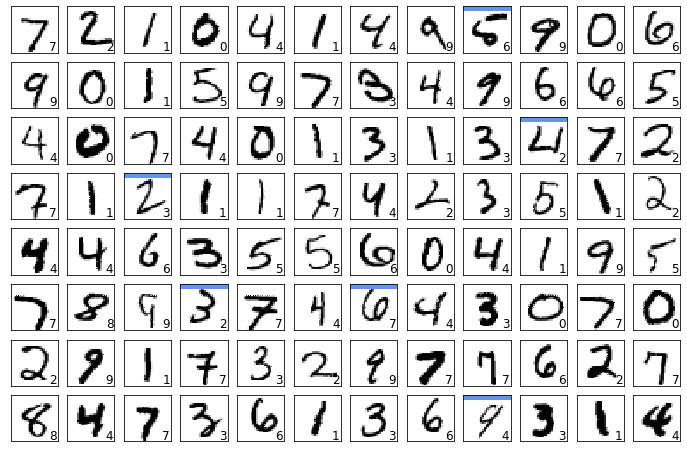

In [ ]:
# 리스트 8-1-(9)
show_prediction()
plt.show()

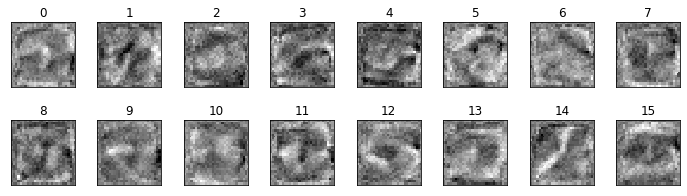

In [ ]:
#-- 리스트 8-1-(10)
# 1층째의 무게 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 공간 필터

기존의 방식은 28x28의 이미지를 784x1로 flatten해서 입력값에 넣어주었다.  
그러나 공간 필터를 이용하면 28x28의 이미지 모양 그대로 유지한채로 학습이 가능하다.  
이러한 방식을 흔히 CNN이라고 부른다.

In [ ]:
#-- 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

필터의 값을 변경하는 것으로 대각선 엣지 강조, 이미지 스무딩 등의 다양한 처리가 가능하다.  
흰색: 0, 검정색: 1의 값을 가지게된다.

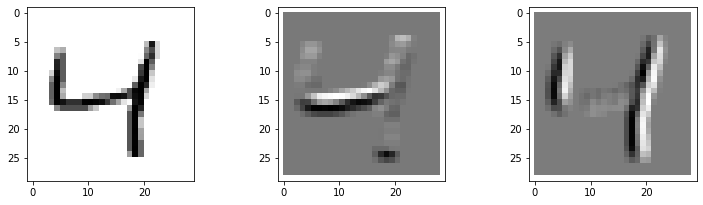

In [ ]:
#-- 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

## CNN(합성곱 신경망)

필터를 신경망에 적용시켜서 학습을 시킨다.  
기존의 가중치 -> 필터의 값  
정확도의 경우 ReLU 함수를 이용한 2층 신경망보다 더 증가한 0.97을 나타냈다.

In [ ]:
|#-- 리스트 8-2-(3)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # CNN을 사용
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu')) # (3, 3)의 필터를 8개 사용
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 11s 180ms/step - loss: 1.0557 - accuracy: 0.8032 - val_loss: 0.3888 - val_accuracy: 0.9013
Epoch 2/20
60/60 [==============================] - 11s 178ms/step - loss: 0.3201 - accuracy: 0.9139 - val_loss: 0.2498 - val_accuracy: 0.9343
Epoch 3/20
60/60 [==============================] - 12s 203ms/step - loss: 0.2347 - accuracy: 0.9363 - val_loss: 0.2012 - val_accuracy: 0.9471
Epoch 4/20
60/60 [==============================] - 11s 178ms/step - loss: 0.1931 - accuracy: 0.9470 - val_loss: 0.1697 - val_accuracy: 0.9536
Epoch 5/20
60/60 [==============================] - 11s 177ms/step - loss: 0.1657 - accuracy: 0.9541 - val_loss: 0.1492 - val_accuracy: 0.9585
Epoch 6/20
60/60 [==============================] - 11s 179ms/step - loss: 0.1437 - accuracy: 0.9608 - val_loss: 0.1317 - val_accuracy: 0.9652
Epoch 7/20
60/60 [==============================] - 11s 178ms/step - loss: 0.1276 - accuracy: 0.9653 - val_loss: 0.1192 - val_accuracy: 0.9681

In [ ]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

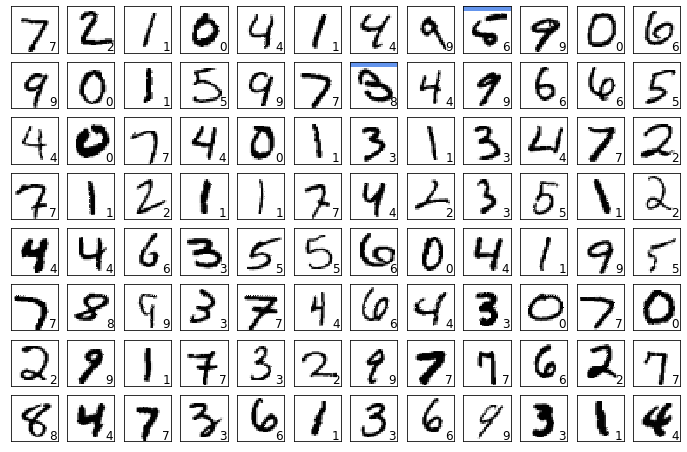

In [ ]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

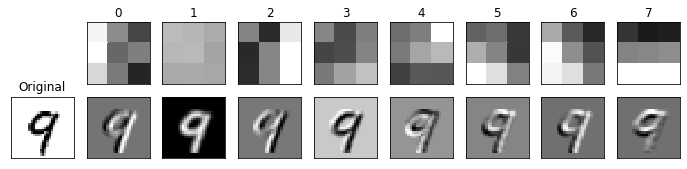

In [ ]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

CNN에 풀링과 드롭아웃을 적용하여 계층의 수를 늘리고 최종적으로 네트워크를 구축  
정확도를 0.99까지 끌어올림

In [ ]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 71s 1s/step - loss: 0.6495 - accuracy: 0.7983 - val_loss: 0.1129 - val_accuracy: 0.9672
Epoch 2/20
60/60 [==============================] - 70s 1s/step - loss: 0.1281 - accuracy: 0.9617 - val_loss: 0.0571 - val_accuracy: 0.9830
Epoch 3/20
60/60 [==============================] - 71s 1s/step - loss: 0.0869 - accuracy: 0.9745 - val_loss: 0.0424 - val_accuracy: 0.9866
Epoch 4/20
60/60 [==============================] - 72s 1s/step - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 5/20
60/60 [==============================] - 75s 1s/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0317 - val_accuracy: 0.9901
Epoch 6/20
60/60 [==============================] - 80s 1s/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 7/20
60/60 [==============================] - 72s 1s/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0283 - val_accuracy: 0.9910
Epoch 8/20
60/60 [==

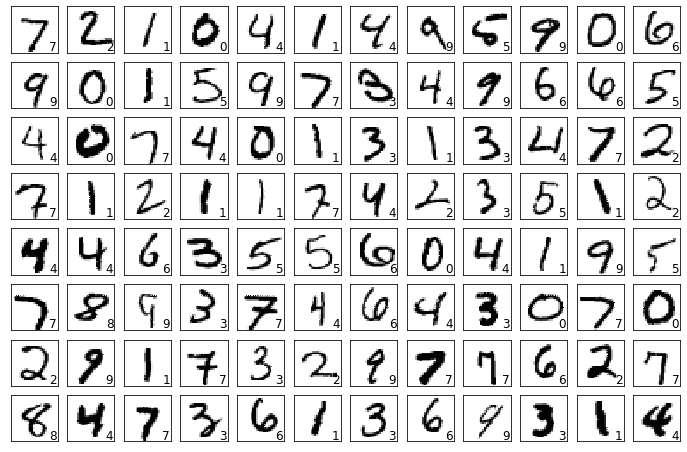

In [ ]:
# 리스트 8-2-(7)
show_prediction()
plt.show()

# After

drop out을 하는 이유?  
-> 신경망을 깊게 쌓을 수록 train data에 overfitting되는 현상이 발생하기가 쉽다.  
따라서 미니배치마다 노드를 랜덤하게 끊어서 drop out을 사용한다.  
-> 특정 뉴런의 bias나 weight가 큰 값을 갖게 되면 그것의 영향으로 인해 다른 뉴런의 학습속도가 늦어지는 경우가 있다.  
이때 drop out을 사용하면 결과적으로 서로 영향을 받지 않기 때문에 흔히 이야기하는 co-adaption을 피할 수 있다.